# Public Schools in Ontario
This notebook contains code for downloading/scraping the data, data cleaning, preparation and loading to databases for visualization using Tableau. 
The data is further cleaned and processed and used for training and evaluating machine learning model.


## Ontario Schools Data
* Data Source : https://www.ontario.ca/data/school-information-and-student-demographics

In [7]:
#Import dependancies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Visit URL & download data, save as Excel file

import requests

url="https://files.ontario.ca/opendata/sif_data_table_2017_2018prelim_en_june.xlsx"

myfile = requests.get(url)

output = open('../Data/Schools_EQAO/sif_data_table_2017_2018prelim_en_june.xlsx', 'wb')

output.write(myfile.content)

output.close()

print("Done!")

Done!


In [9]:
# Read excel file downloaded above

path="../Data/Schools_EQAO/sif_data_table_2017_2018prelim_en_june.xlsx"
schools_eqao=pd.read_excel(path)
schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Extract Date
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,NaN,N/D,NaN,N/R,NaN,N/R,NaN,22.7,20.5,2019-06-17
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,-36.0,NaN,NaN,NaN,NaN,NaN,NaN,11,56.3,2019-06-17
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-06-17
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,32,31.4,2019-06-17
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,-11.0,NaN,NaN,NaN,NaN,NaN,NaN,24.8,19.8,2019-06-17


In [10]:
#Describe data

schools_eqao.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrolment,4819.0,418.172235,304.687226,10.00000,216.000000,346.00000,534.00000,2080.00000
Latitude,4887.0,44.232766,1.436709,41.80695,43.481690,43.77387,44.50844,51.46627
Longitude,4887.0,-79.711127,2.593013,-94.56370,-80.308555,-79.56298,-79.21214,-74.47102
Change in Grade 3 Reading Achievement Over Three Years,3084.0,2.948119,13.878343,-56.00000,-5.000000,3.00000,11.00000,65.00000
Change in Grade 3 Writing Achievement Over Three Years,3086.0,-2.086520,16.039496,-74.00000,-11.000000,-3.00000,7.00000,92.00000
Change in Grade 3 Mathematics Achievement Over Three Years,3134.0,-1.945437,16.200346,-77.00000,-12.000000,-2.00000,7.75000,85.00000
Change in Grade 6 Reading Achievement Over Three Years,2917.0,1.146726,11.355510,-42.00000,-5.000000,1.00000,7.00000,57.00000
Change in Grade 6 Writing Achievement Over Three Years,2917.0,-0.562564,13.019662,-68.00000,-8.000000,0.00000,7.00000,64.00000
Change in Grade 6 Mathematics Achievement Over Three Years,2915.0,-1.553002,16.380268,-69.00000,-11.000000,-1.00000,8.00000,65.00000
Change in Grade 9 Academic Mathematics Achievement Over Three Years,699.0,0.964235,10.739298,-50.00000,-4.000000,1.00000,6.00000,64.00000


In [11]:
# Change dtype of all columns containing 'percentage' to float, remove % sign and convert to .2f
# Replace 'nan',''NA','SP' and 'N/D' by 'NaN'. 

for column in schools_eqao.columns:
    if 'Percentage' in column:
        schools_eqao[column].replace(to_replace=['SP','N/D','N/R','NA'],value=np.nan,inplace=True)
        schools_eqao[column]= schools_eqao[column].str.replace(r'%',r'').astype('float')
        

In [12]:
# Check data types

schools_eqao.dtypes

Board Number                                                                                        object
Board Name                                                                                          object
Board Type                                                                                          object
School Number                                                                                       object
School Name                                                                                         object
School Type                                                                                         object
School Special Condition Code                                                                       object
School Level                                                                                        object
School Language                                                                                     object
Grade Range                          

In [13]:
# Drop columns with blank lat and long

# Get names of indexes for which column Latitude is null
indexNames = schools_eqao[ schools_eqao['Latitude'].isnull()].index
 
# Delete these row indexes from dataFrame
schools_eqao.drop(indexNames , inplace=True)

schools_eqao.reset_index(drop=True)

schools_eqao.count()

Board Number                                                                                4887
Board Name                                                                                  4887
Board Type                                                                                  4887
School Number                                                                               4887
School Name                                                                                 4887
School Type                                                                                 4887
School Special Condition Code                                                               4887
School Level                                                                                4887
School Language                                                                             4887
Grade Range                                                                                 4887
Building Suite                

In [14]:
#Insert new column with avg. EQAO scores 

schools_eqao['Avg_EQAO']=\
schools_eqao[['Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',\
              'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',\
              'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics',\
              'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics',\
              'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics',\
              'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt'
             ]].mean(axis=1)


In [15]:
#Insert new column with avg. change in EQAO scores 

schools_eqao['Avg_change_EQAO']=\
schools_eqao[['Change in Grade 3 Reading Achievement Over Three Years',\
              'Change in Grade 3 Writing Achievement Over Three Years',\
              'Change in Grade 3 Mathematics Achievement Over Three Years',\
              'Change in Grade 6 Reading Achievement Over Three Years',\
              'Change in Grade 6 Writing Achievement Over Three Years',\
              'Change in Grade 6 Mathematics Achievement Over Three Years',\
              'Change in Grade 9 Academic Mathematics Achievement Over Three Years',\
              'Change in Grade 9 Applied Mathematics Achievement Over Three Years',\
              'Change in Grade 10 OSSLT Literacy Achievement Over Three Years'
             ]].mean(axis=1)

In [16]:
#drop values with NaN Avg EQAO
schools_eqao.dropna(subset=['Avg_EQAO'])

#Delete Columns only when all values are Null
schools_eqao = schools_eqao.dropna(axis=1,how='all')

#Rename Columns

schools_eqao.columns = schools_eqao.columns.str.replace('Percentage of','Perc')
schools_eqao.columns = schools_eqao.columns.str.replace('Students','stud')

char=[' Whose',' Who',' Is',' Achievement Over Three Years',' to',' Achieving the Provincial Standard in',\
     ' Have',' Some',' Speaking Country',' from']

for char in char:
    schools_eqao.columns = schools_eqao.columns.str.replace(char,'')

In [17]:
# Review new column names

schools_eqao.columns

Index(['Board Number', 'Board Name', 'Board Type', 'School Number',
       'School Name', 'School Type', 'School Special Condition Code',
       'School Level', 'School Language', 'Grade Range', 'Building Suite',
       'P.O. Box', 'Street', 'Municipality', 'City', 'Province', 'Postal Code',
       'Phone Number', 'Fax Number', 'School Website', 'Board Website',
       'Enrolment', 'Latitude', 'Longitude',
       'Perc stud First Language Not English',
       'Perc stud First Language Not French',
       'Perc stud Are New Canada a Non-English',
       'Perc stud Are New Canada a Non-French',
       'Perc stud Receiving Special Education Services',
       'Perc stud Identified as Gifted', 'Perc Grade 3 stud Reading',
       'Change in Grade 3 Reading', 'Perc Grade 3 stud Writing',
       'Change in Grade 3 Writing', 'Perc Grade 3 stud Mathematics',
       'Change in Grade 3 Mathematics', 'Perc Grade 6 stud Reading',
       'Change in Grade 6 Reading', 'Perc Grade 6 stud Writing',
     

In [18]:
# Review data frame

schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Change in Grade 9 Academic Mathematics,Perc Grade 9 stud Applied Mathematics,Change in Grade 9 Applied Mathematics,Perc stud That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy,Perc Children Live in Low-Income Households,Perc stud Parents University Education,Extract Date,Avg_EQAO,Avg_change_EQAO
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,NaN,NaN,NaN,NaN,NaN,22.7,20.5,2019-06-17,NaN,NaN
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,11.0,56.3,2019-06-17,59.666667,-23.166667
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,...,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-06-17,68.666667,22.000000
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,32.0,31.4,2019-06-17,41.333333,-24.333333
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,24.8,19.8,2019-06-17,45.500000,-14.833333


###  Put cleaned dataframe in MySql db for future use

Tableau is directly connected to this database for data visualization purposes

In [14]:
from sqlalchemy import *
from sqlalchemy.schema import CreateSchema
import pymysql
from config import username,pwd,host
import pymongo

#database connection
metadata = MetaData()
engine = create_engine(f'mysql+pymysql://{username}:{pwd}@{host}:3306')
engine.execute(CreateSchema('Schools'))

In [15]:
engine.execute("USE Schools")
schools_eqao.to_sql(name='schools_data', con=engine, if_exists = 'replace', index=False)

## Ontario education news

Scrape the latest news on education from Government of Ontario's website. https://news.ontario.ca/
This will be cleaned processed using nltk libraries and visualized using Tableau.

In [26]:
# Scrape news from the web
from bs4 import BeautifulSoup

news_list=[]
time_list=[]
link_list=[]

#Scraping 120 pages of news
for i in range(1,121):
    url = 'https://news.ontario.ca/en/search?entry_blog_ids%5B%5D=22&page='+str(i)

# Retrieve page with the requests module
    response = requests.get(url)

# Create BeautifulSoup object; parse with 'lxml'
    soup = BeautifulSoup(response.text, 'lxml')

    news = soup.find_all('h2',class_="accessibility-sub-header")
    time = soup.find_all('time')
    

    for news in news:
        news_list.append(news.text)
        link_list.append(news.a['href'])
    
    for time in time:
        time_list.append(time.text)



In [27]:
df=pd.DataFrame(list(zip(news_list,time_list,link_list)),columns=['headline','time','link'])
df.head()

,headline,time,link
0,Education Minister to Hold a Media Availability,"October 24, 2019 12:30 P.M.",https://news.ontario.ca/edu/en/2019/10/educati...
1,Electronic Press Kit Now Available: Ontario Mo...,"October 11, 2019 12:45 P.M.",https://news.ontario.ca/edu/en/2019/10/electro...
2,Ontario More Than Doubles Mental Health Fundin...,"October 10, 2019 11:11 A.M.",https://news.ontario.ca/edu/en/2019/10/ontario...
3,Mental Health Supports in Ontario Schools,"October 10, 2019 10:30 A.M.",https://news.ontario.ca/edu/en/2019/10/mental-...
4,Education Minister to Make an Announcement,"October 9, 2019 2:30 P.M.",https://news.ontario.ca/edu/en/2019/10/educati...


In [28]:
# Converting date from string to date-time

import re
from datetime import datetime

time = df['time']
year=[]
month=[]
day=[]

for string in time:
   year.append(string[string.find(', ')+len(', '):string.rfind('')][0:4])
   month.append(string.split(' ')[0])
   day.append(string.split(', 2')[0].split(' ')[-1])

for i in range (0,len(time)):
    s=year[i]+' '+month[i]+' '+day[i]
    time[i]=datetime.strptime(s, '%Y %B %d')

In [29]:
df.head()

,headline,time,link
0,Education Minister to Hold a Media Availability,2019-10-24 00:00:00,https://news.ontario.ca/edu/en/2019/10/educati...
1,Electronic Press Kit Now Available: Ontario Mo...,2019-10-11 00:00:00,https://news.ontario.ca/edu/en/2019/10/electro...
2,Ontario More Than Doubles Mental Health Fundin...,2019-10-10 00:00:00,https://news.ontario.ca/edu/en/2019/10/ontario...
3,Mental Health Supports in Ontario Schools,2019-10-10 00:00:00,https://news.ontario.ca/edu/en/2019/10/mental-...
4,Education Minister to Make an Announcement,2019-10-09 00:00:00,https://news.ontario.ca/edu/en/2019/10/educati...


In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

#Concatenate all headlines for analysis
headlines = df.headline.str.cat(sep=' ')


#function to split text into word
tokens = word_tokenize(headlines)

stop_words = set(stopwords.words('english'))
stop_words.update(["Ontario",":","-",",","archive","ontario","minister","'s"])


tokens = [w.lower() for w in tokens]
tokens = [lemmatizer.lemmatize(w) for w in tokens]
tokens = [w for w in tokens if not w in stop_words]



frequency_dist = nltk.FreqDist(tokens)

top_N = 100

rslt = pd.DataFrame(frequency_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt.head(20)

,Word,Frequency
0,education,446
1,school,374
2,medium,315
3,advisory,298
4,student,292
5,make,174
6,announcement,164
7,board,122
8,new,110
9,government,106


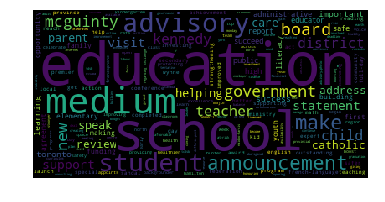

In [35]:
# Create wordcloud. Also visualized in Tableau

from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Save scraping Data to MongoDb
Tableau is connected to this database for visualization purposes. This data is not further used for machine learning.

In [36]:
import pymongo

conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [37]:
#create db
db = client.schoolDB

#create tables
headlines = db.headlines.find()
wordfreq = db.wordfreq.find()

#populate tables
db.headlines.insert_many(df.to_dict('records'))
db.wordfreq.insert_many(rslt.to_dict('records'))

# Machine Learning

Machine learning model to predict performance of a school based on characteristics of a school and characteristics of the population in vicinity of the school.

## Mapping population of nearest geographical areas to school data using latitude and longitude

In [19]:
#Read Dissemination Area (DA) file containing census DA centre lat and long

path="../Data/DA centre lat long/DA_centre_lat_long_Ontario_cleaned.xlsx"

da_df=pd.read_excel(path)
da_df.head()

,DA_id,DA_lat,DA_long
0,35510089,45.734932,-82.328953
1,35520104,46.258873,-81.796169
2,35520114,46.237923,-81.800407
3,35510072,45.974472,-81.965987
4,35510070,45.927388,-81.894390


In [22]:
# Map nearest 4 DAs to the school
#use scipy.spatial.KDTree.query to find nearest neighbor

from scipy import spatial
tree = spatial.KDTree(list(zip(da_df['DA_lat'], da_df['DA_long'])))

# print(tree.data)

school_loc = list(zip(schools_eqao['Latitude'],schools_eqao['Longitude']))

n=len(school_loc)

Nearest4DA=[]

for i in range (0,n) :
    Nearest4DA.append(list(da_df.loc[tree.query(school_loc[i],k=4, eps=0, p=2)[1]]['DA_id']))
    
schools_eqao['Nearest4DA']=Nearest4DA

schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Perc Grade 9 stud Applied Mathematics,Change in Grade 9 Applied Mathematics,Perc stud That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy,Perc Children Live in Low-Income Households,Perc stud Parents University Education,Extract Date,Avg_EQAO,Avg_change_EQAO,Nearest4DA
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,NaN,NaN,NaN,NaN,22.7,20.5,2019-06-17,NaN,NaN,"[35570382, 35570097, 35570099, 35570096]"
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,11.0,56.3,2019-06-17,59.666667,-23.166667,"[35570112, 35570111, 35570065, 35570068]"
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,...,NaN,NaN,NaN,NaN,34.3,37.2,2019-06-17,68.666667,22.000000,"[35570324, 35570323, 35570319, 35570317]"
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,32.0,31.4,2019-06-17,41.333333,-24.333333,"[35570094, 35570093, 35570095, 35570061]"
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,24.8,19.8,2019-06-17,45.500000,-14.833333,"[35570340, 35570341, 35570332, 35570339]"


In [23]:
# Read census file

path="../Data/Census/Census_2016_ON_v2.xlsx"

census_df=pd.read_excel(path)
census_df.head()

,GEO UID,Population_2016,Avg_age,Age_0to14yrs,Age_15to64yrs,Age_65+yrs,Avg_household_size,Dwelling_Total,Dwelling_Single-detached house,Dwelling_Apartment,...,Education_Secondary(high)SchoolDiploma,Education_PostsecondaryCertificateDiplomaDegree,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove,Labour_InLabourForce,Labour_InLabourForce_Employed,Labour_InLabourForce_Unemployed,Labour_NotInLabourForce
0,3501,113429.0,44.1,15.7,62.6,21.8,2.3,47830.0,33550.0,1195.0,...,29220.0,42965.0,8285.0,22700.0,1720.0,10265.0,55175.0,50890.0,4290.0,37895.0
1,35010155,457.0,45.9,11.0,67.0,23.1,2.5,185.0,185.0,0.0,...,120.0,210.0,35.0,115.0,15.0,50.0,270.0,250.0,20.0,130.0
2,35010156,448.0,46.5,12.4,67.4,20.2,2.2,205.0,190.0,0.0,...,115.0,240.0,80.0,90.0,10.0,55.0,270.0,265.0,0.0,180.0
3,35010157,469.0,43.6,18.1,62.8,19.1,2.5,190.0,185.0,0.0,...,120.0,160.0,10.0,70.0,15.0,65.0,280.0,260.0,15.0,105.0
4,35010158,492.0,44.7,15.2,66.7,18.2,2.4,200.0,195.0,0.0,...,75.0,240.0,65.0,95.0,15.0,60.0,260.0,230.0,30.0,155.0
